In [2]:
# Based from the tutorial of Jason Brownlee on Recurrent Neural Networks
%matplotlib inline

from __future__ import print_function

import os
os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=gpu,floatX=float32"


import numpy as np
import matplotlib.pyplot as plt
import pandas
import math


from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler

plt.style.use('ggplot')


Using TensorFlow backend.


In [3]:
# fix random seed for reproducibility
np.random.seed(10)

In [4]:
#Use the flood_data.csv dataset
dataframe = pandas.read_csv('dataset/flood_train.csv', usecols=[1], engine='python', skipfooter=3)
dataset   = dataframe.values
dataset   = dataset.astype('float32')
dataframe.head()

,waterlevel
0,0.27
1,0.26
2,0.27
3,0.28
4,0.28


Text(0.5,1,u'Dataset Visualization')

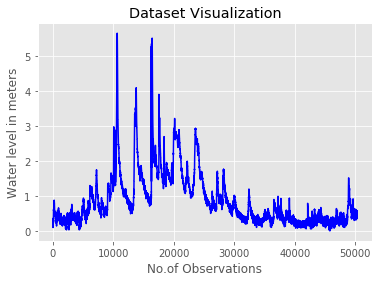

In [5]:
plt.plot(dataset,'b', scaley=True)
plt.xlabel('No.of Observations')
plt.ylabel('Water level in meters')
plt.title('Dataset Visualization')

In [6]:
# normalize the dataset
scaler  = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [7]:
# split into train and test sets
train_size  = int(len(dataset) * 0.70)
test_size   = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print("length of training data:",len(train))
print("length of Testing data:", len(test))
print("length of total data:", len(train)+len(test))

length of training data: 35219
length of Testing data: 15095
length of total data: 50314


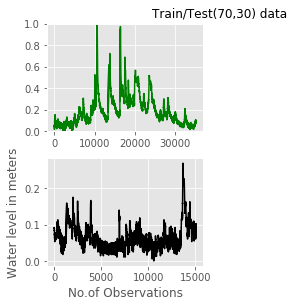

In [8]:
plt.gca().set_ylim(bottom=0)
plt.gca().set_ylim(top=1)
plt.autoscale(False)
plt.figure(1)
plt.subplot(221)
axes=plt.gca()
axes.set_ylim([0,1])
plt.suptitle('Train/Test(70,30) data')
plt.plot(train,'g',scaley=True)
plt.grid(True)

plt.subplot(223)
plt.plot(test,'k',scaley=True)
plt.grid(True)
plt.xlabel('No.of Observations')
plt.ylabel('Water level in meters')
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)
plt.show()

In [9]:
# This function creates a sliding window of the dataset.
def create_dataset(dataset, sliding_window=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-sliding_window-1):
        a = dataset[i:(i+sliding_window), 0]
        dataX.append(a)
        dataY.append(dataset[i + sliding_window, 0])
    return np.array(dataX), np.array(dataY)

In [10]:
# use a n-10 sliding window equivalent to 1.5 hours of historical data
#10 features
slide_window   = 10
trainX, trainY = create_dataset(train, slide_window)
testX, testY   = create_dataset(test, slide_window)

In [11]:
print("trainX shape")
print(trainX.shape)
print("testX shape")
print(testX.shape)

print("trainX")
print(trainX[1])
print("trainY")
print(trainY[1])

trainX shape
(35208, 10)
testX shape
(15084, 10)
trainX
[ 0.04593639  0.04770318  0.04946997  0.04946997  0.04946997  0.05123675
  0.04240283  0.04416961  0.04770318  0.05123675]
trainY
0.0530035


In [12]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX  = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [13]:
print("trainX")
print(trainX.shape)
print("trainY")
print(testX.shape)

trainX
(35208, 1, 10)
trainY
(15084, 1, 10)


In [26]:
#Setup the LSTM

model = Sequential()
model.add(LSTM(4, input_dim=slide_window))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=50, batch_size=1, verbose=2)

/Users/rohithkumarn/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  after removing the cwd from sys.path.
/Users/rohithkumarn/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(4, input_shape=(None, 10))`
  after removing the cwd from sys.path.
/Users/rohithkumarn/anaconda2/lib/python2.7/site-packages/keras/models.py:874: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/50
 - 118s - loss: 1.9614e-04
Epoch 2/50
 - 110s - loss: 1.2315e-04
Epoch 3/50
 - 119s - loss: 1.1009e-04
Epoch 4/50
 - 101s - loss: 1.0936e-04
Epoch 5/50
 - 99s - loss: 1.0383e-04
Epoch 6/50
 - 155s - loss: 1.0266e-04
Epoch 7/50
 - 109s - loss: 1.0036e-04
Epoch 8/50
 - 106s - loss: 9.9319e-05
Epoch 9/50
 - 111s - loss: 9.7384e-05
Epoch 10/50
 - 180s - loss: 9.7569e-05
Epoch 11/50
 - 180s - loss: 9.8016e-05
Epoch 12/50
 - 152s - loss: 9.8513e-05
Epoch 13/50
 - 157s - loss: 9.6629e-05
Epoch 14/50
 - 122s - loss: 9.5191e-05
Epoch 15/50
 - 120s - loss: 9.5721e-05
Epoch 16/50
 - 133s - loss: 9.8351e-05
Epoch 17/50
 - 125s - loss: 9.6022e-05
Epoch 18/50
 - 124s - loss: 9.6347e-05
Epoch 19/50
 - 126s - loss: 9.5972e-05
Epoch 20/50
 - 114s - loss: 9.3614e-05
Epoch 21/50
 - 129s - loss: 9.7546e-05
Epoch 22/50
 - 114s - loss: 9.5045e-05
Epoch 23/50
 - 118s - loss: 9.3473e-05
Epoch 24/50
 - 121s - loss: 9.5382e-05
Epoch 25/50
 - 141s - loss: 9.5794e-05
Epoch 26/50
 - 127s - loss: 9.4562e

In [271]:
#saving trained model
model.save('floodlstm.h5')

Train Score from loaded model: 0.05 RMSE


In [25]:
#loading trained model
from keras.models import load_model
model=load_model('floodlstm.h5')
trainScore = trained_model.evaluate(trainX, trainY, verbose=0)
# print(trainScore)
trainScore = math.sqrt(trainScore)
# print(trainScore)
trainScore = scaler.inverse_transform(np.array([[trainScore]]))
print('Train Score from loaded model: %.2f RMSE' % (trainScore))

Train Score from loaded model: 0.24 RMSE


In [26]:
# Print out the evaluation for both the
trainScore = model.evaluate(trainX, trainY, verbose=0)
trainScore = math.sqrt(trainScore)
trainScore = scaler.inverse_transform(np.array([[trainScore]]))
print('Training Accuracy: %.2f percent' % ((1-trainScore)*100))
testScore = model.evaluate(testX, testY, verbose=0)
testScore = math.sqrt(testScore)
testScore = scaler.inverse_transform(np.array([[testScore]]))
print('Testing Accuracy: %.2f percent' % ((1-testScore)*100))

Training Accuracy: 76.22 percent
Testing Accuracy: 77.77 percent


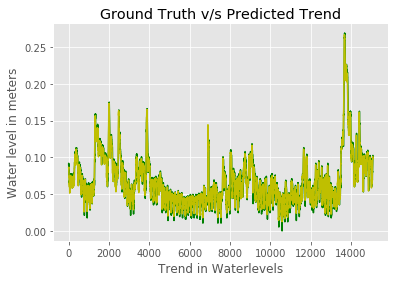

In [27]:
testPredict=model.predict(testX)
plt.plot(test,'g', scaley=True)
plt.xlabel("Trend in Waterlevels")
plt.ylabel("Water level in meters")
plt.title('Ground Truth v/s Predicted Trend')
plt.plot(testPredict,'y')
plt.show()

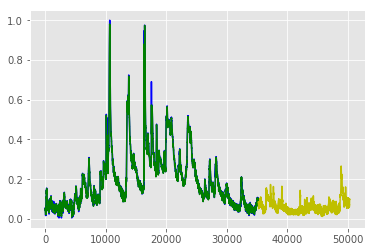

In [28]:
trainPredict = model.predict(trainX)
testPredict  = model.predict(testX)
 
#shift test actual values for plotting    
# mtestPlot       = np.empty_like(dataset)
# mtestPlot[:, :] = np.nan
# mtestPlot[len(testX)+(slide_window*2)+1:len(dataset)-1,:] = testX

# shift train predictions for plotting
trainPredictPlot       = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[slide_window:len(trainPredict)+slide_window, :] = trainPredict
 
# shift test predictions for plotting
testPredictPlot       = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(slide_window*2)+1:len(dataset)-1, :] = testPredict
 
# plot baseline and predictions
plt.plot(train,'b')
# plt.show()
plt.plot(trainPredictPlot,'g')
# plt.show()
# plt.plot(mtest,'r')
plt.plot(testPredictPlot,'y')
plt.show()

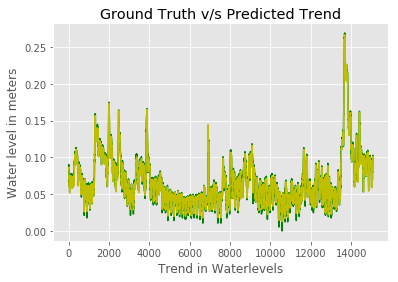

In [29]:
plt.plot(testY,'g', scaley=True)
plt.xlabel("Trend in Waterlevels")
plt.ylabel("Water level in meters")
plt.title('Ground Truth v/s Predicted Trend')
plt.plot(testPredict,'y')
plt.show()

In [30]:
# Test the network on an unseen data
unseen = pandas.read_csv('dataset/flood_test.csv',sep=',')

In [31]:
unseen.head()

,datetime,rainfall,waterlevel
0,1/1/2013 0:10,0.0,0.21
1,1/1/2013 0:21,0.0,0.21
2,1/1/2013 0:30,0.0,0.40
3,1/1/2013 1:30,0.0,0.49
4,1/1/2013 1:40,0.0,0.59


In [39]:
unseen_test = unseen['waterlevel'].values

In [40]:
unseen_test_values=unseen_test[0:100]
print(unseen_test_values)

[ 0.21  0.21  0.4   0.49  0.59  0.55  0.56  0.56  0.58  0.58  0.51  0.53
  0.57  0.58  0.57  0.58  0.54  0.5   0.53  0.5   0.57  0.62  0.57  0.62
  0.57  0.63  0.58  0.63  0.6   0.56  0.63  0.62  0.61  0.65  0.65  0.68
  0.64  0.64  0.64  0.65  0.57  0.65  0.66  0.58  0.8   0.82  0.83  0.76
  0.81  0.83  0.83  0.78  0.82  0.81  0.7   0.74  0.72  0.75  0.71  0.73
  0.71  0.69  0.7   0.69  0.59  0.67  0.64  0.7   0.67  0.7   0.65  0.63
  0.64  0.59  0.65  0.65  0.69  0.65  0.62  0.69  0.63  0.67  0.57  0.65
  0.63  0.6   0.56  0.59  0.64  0.57  0.62  0.53  0.55  0.56  0.58  0.54
  0.63  0.61  0.55  0.61]


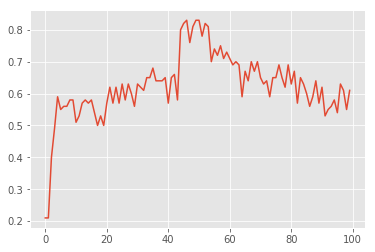

In [41]:
# plt.gca().set_ylim(bottom=0)
# plt.gca().set_ylim(top=1)
# plt.gca().set_xlim(left=0)
# plt.gca().set_xlim(right=10)
plt.plot(unseen_test_values)

In [42]:
unseen_clean = []
for i in unseen_test_values:
    unseen_clean.append([i])
unseen_clean = np.asarray(unseen_clean).astype('float32')
unseen_clean = scaler.fit_transform(unseen_clean)

In [43]:
features,labels = create_dataset(unseen_clean, slide_window)
features        = np.reshape(features, (features.shape[0],1, features.shape[1])) 

In [44]:
unseen_results=model.predict(features)

-------------------- Predicted --------------------
-------------------- Ground Truth --------------------


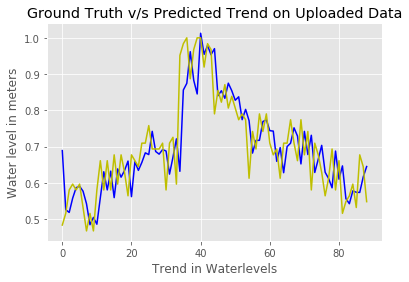

In [46]:
# plt.gca().set_ylim(bottom=0)
# plt.gca().set_ylim(top=1)
print('-------------------- Predicted --------------------')
plt.plot(unseen_results,'b',scaley=True)
print('-------------------- Ground Truth --------------------')
plt.xlabel("Trend in Waterlevels")
plt.ylabel("Water level in meters")
plt.title('Ground Truth v/s Predicted Trend on Uploaded Data')
plt.plot(labels,'y')
plt.show()

In [510]:
# Check the root mean squared error for the new test set
testScore = model.evaluate(features, labels, verbose=0)
testScore = math.sqrt(testScore)
testScore = scaler.inverse_transform(np.array([[testScore]]))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 0.30 RMSE


#### It seems that the network is having a hard time predicting higher flood level values
#### Checking the first 20000 data shows that the network is relatively comfortable on predicting ahead of time flood level values when the flood level  aren't extreme